In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('/Users/twff/Downloads/1001 project/final_dummies_training.csv').dropna()


In [3]:
# train_data = train_data.dropna(0, how = 'all')
data = data.drop('review_id',1)
data = data.drop('Unnamed: 0',1)


In [4]:
data = data.reset_index(range(len(data)))
data=data.sample(frac=0.01)


In [22]:
df = data.drop('text', 1)

In [5]:
from sklearn.cross_validation import train_test_split

X = data['text']
Y = data['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)


/Users/twff/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train.shape, Y_train.shape


((2445,), (2445,))

### Baseline model

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer.fit(X_train)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
review_train_tfidf = tfidf_vectorizer.transform(X_train)
review_test_tfidf = tfidf_vectorizer.transform(X_test)


In [11]:
review_train_tfidf


<2445x12875 sparse matrix of type '<class 'numpy.float64'>'
	with 173363 stored elements in Compressed Sparse Row format>

In [12]:
len(Y_train)


2445

In [46]:
svmmodel_tfidf = svm.SVC(kernel='linear',probability=True)
svmmodel_tfidf.fit(review_train_tfidf, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
w = svmmodel_tfidf.coef_
t = svmmodel_tfidf.intercept_
w,t

(<1x13695 sparse matrix of type '<class 'numpy.float64'>'
 	with 12777 stored elements in Compressed Sparse Row format>,
 array([-0.99923108]))

In [50]:
svmmodel_tfidf.coef_[0]

<1x13695 sparse matrix of type '<class 'numpy.float64'>'
	with 12777 stored elements in Compressed Sparse Row format>

In [16]:
review = svmmodel_tfidf.predict_proba(review_test_tfidf)
review

array([[ 0.43128641,  0.56871359],
       [ 0.56156461,  0.43843539],
       [ 0.54067897,  0.45932103],
       ..., 
       [ 0.58862726,  0.41137274],
       [ 0.40835394,  0.59164606],
       [ 0.44389815,  0.55610185]])

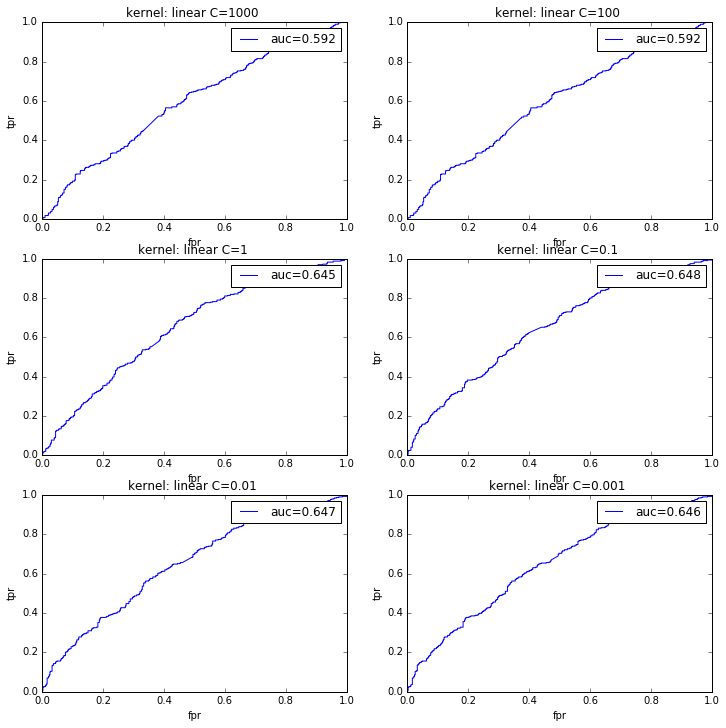

In [55]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (12, 12))
cs = [ 1000, 100, 1, 10e-2, 10e-3, 10e-4 ]
aucs = []
for i, c in enumerate(cs):
    my_svm = svm.SVC(kernel='linear', C=c, probability=True)
    my_svm.fit(review_train_tfidf, Y_train)
    ax = fig.add_subplot(3, 2, i+1)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, my_svm.predict_proba(review_test_tfidf)[:,1])
    aucs.append(auc(fpr,tpr))
    plt.plot(fpr,tpr,label = "auc=%.3f" % auc(fpr, tpr))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('kernel: linear C={} '.format(c))
    plt.legend()

<Container object of 6 artists>

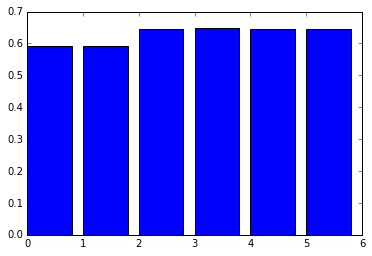

In [62]:
plt.bar(range(6), aucs)

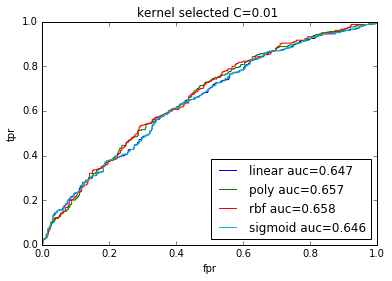

In [95]:
aucs = []
my_svm = svm.SVC(kernel='linear', C=0.01, probability=True)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 1)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, my_svm.predict_proba(review_test_tfidf)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "linear auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: linear C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 2)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, my_svm.predict_proba(review_test_tfidf)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "poly auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: ploy C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 3)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, my_svm.predict_proba(review_test_tfidf)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "rbf auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: rbf C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(kernel='sigmoid', C=0.01, probability=True)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 4)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, my_svm.predict_proba(review_test_tfidf)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "sigmoid auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('kernel selected C=0.01 '.format(c))
plt.legend(loc = 4)

plt.show()


In [8]:
test = pd.read_csv('/Users/twff/Downloads/1001 project/final_dummies_test.csv').dropna()
test.head(3)

,Unnamed: 0,text,review_id,Label,votes_total_user,1.0_Price,2.0_Price,3.0_Price,4.0_Price,normalized_votes,...,1.0_Noise Level,0.0_Take-out,1.0_Take-out,0.0_Attire,1.0_Attire,1.0_Ambience_score,2.0_Ambience_score,3.0_Ambience_score,4.0_Ambience_score,6.0_Ambience_score
0,4,First the only reason this place could possibl...,AEyiQ_Y44isJmNbMTyoMKQ,1.0,39.0,1.0,0.0,0.0,0.0,-0.195872,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6,I like this place a lot. It's a good toasted h...,3saY_LVFUpkAfd9t86VNdw,0.0,0.0,1.0,0.0,0.0,0.0,-0.207084,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9,Underated and ignored! if you see this ol tim...,KvAuJ5ktYlH1ugtlRTGk-A,1.0,23.0,1.0,0.0,0.0,0.0,-0.200472,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test = test.drop('review_id',1)
test = test.drop('Unnamed: 0',1)
test = test.reset_index(range(len(test)))

In [19]:
final_test = tfidf_vectorizer.transform(test['text'])

In [15]:
test_y = test['Label']

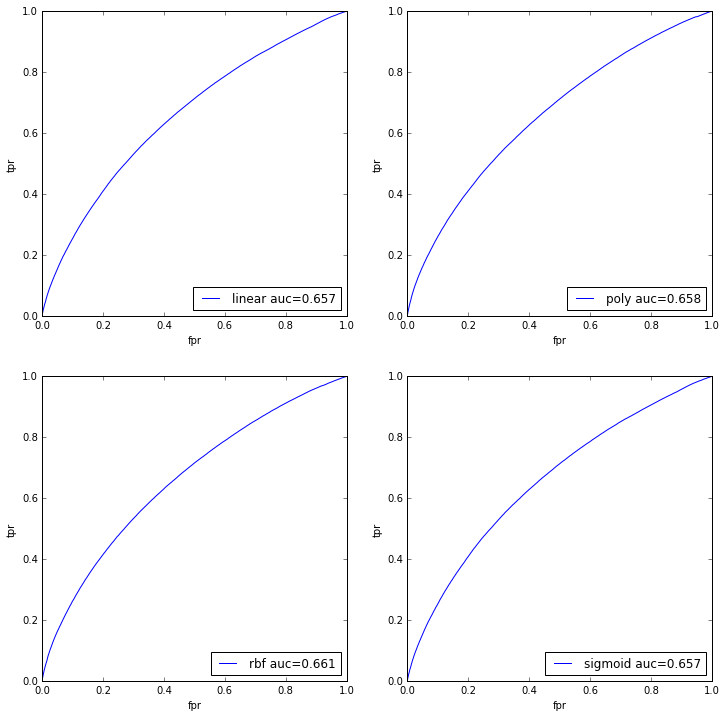

In [21]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

aucs = []
fig = plt.figure(figsize = (12, 12))

my_svm = svm.SVC(kernel='linear', C=0.01, probability=True)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 1)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "linear auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: linear C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 2)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "poly auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: ploy C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 3)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "rbf auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: rbf C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(kernel='sigmoid', C=0.01, probability=True)
my_svm.fit(review_train_tfidf, Y_train)
ax = fig.add_subplot(2, 2, 4)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "sigmoid auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
#plt.title('kernel selected C=0.01 '.format(c))
plt.legend(loc = 4)

plt.show()

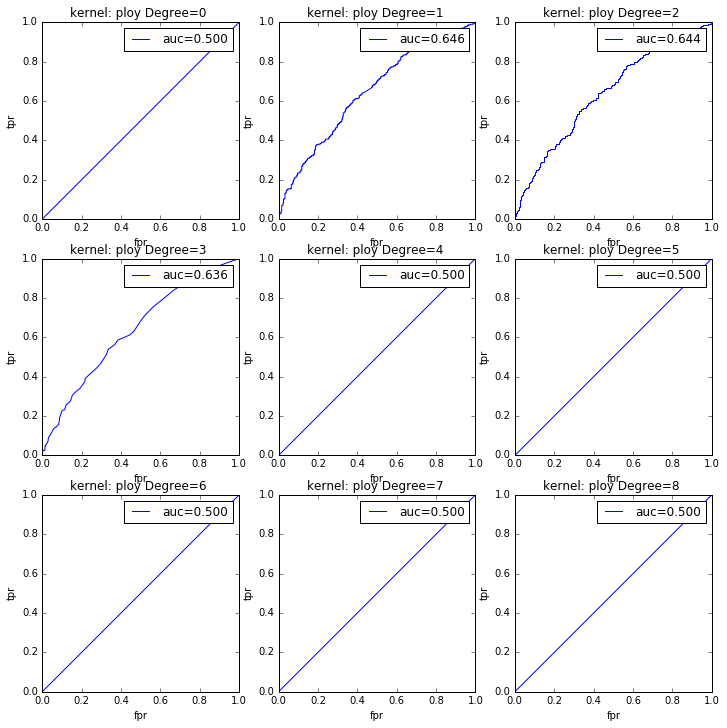

In [75]:
fig = plt.figure(figsize = (12, 12))
de = [0,1,2,3,4,5,6,7,8]
aucs = []
for i, d in enumerate(de):
    my_svm = svm.SVC(kernel='poly', C=0.01, degree = d, probability=True)
    my_svm.fit(review_train_tfidf, Y_train)
    ax = fig.add_subplot(3, 3, i+1)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, my_svm.predict_proba(review_test_tfidf)[:,1])
    aucs.append(auc(fpr,tpr))
    plt.plot(fpr,tpr,label = "auc=%.3f" % auc(fpr, tpr))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('kernel: ploy Degree={} '.format(d))
    plt.legend()

In [13]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf','sigmoid'), 'gamma':[2**(-5),2**(-3),2**(-1),2**(1),2**(3)], 'C':[ 1000, 100, 1, 10e-2, 10e-3, 10e-4 ]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(review_test_tfidf, Y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('poly', 'rbf', 'sigmoid'), 'gamma': [0.03125, 0.125, 0.5, 2, 8], 'C': [1000, 100, 1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.214125,0.092617,0.502451,0.502451,1000,0.03125,poly,"{'gamma': 0.03125, 'kernel': 'poly', 'C': 1000}",40,0.501832,0.502762,0.503676,0.501838,0.501845,0.502752,0.005453,0.003617,0.000867,0.000433
1,0.211150,0.099039,0.562500,1.000000,1000,0.03125,rbf,"{'gamma': 0.03125, 'kernel': 'rbf', 'C': 1000}",34,0.556777,1.000000,0.566176,1.000000,0.564576,1.000000,0.003408,0.002880,0.004110,0.000000
2,0.218324,0.086874,0.564951,1.000000,1000,0.03125,sigmoid,"{'gamma': 0.03125, 'kernel': 'sigmoid', 'C': 1...",30,0.553114,1.000000,0.573529,1.000000,0.568266,1.000000,0.007705,0.003131,0.008664,0.000000
3,0.207990,0.091711,0.583333,1.000000,1000,0.125,poly,"{'gamma': 0.125, 'kernel': 'poly', 'C': 1000}",8,0.586081,1.000000,0.566176,1.000000,0.597786,1.000000,0.010808,0.003537,0.013039,0.000000
4,0.237437,0.095043,0.571078,1.000000,1000,0.125,rbf,"{'gamma': 0.125, 'kernel': 'rbf', 'C': 1000}",24,0.567766,1.000000,0.558824,1.000000,0.586716,1.000000,0.012546,0.005596,0.011616,0.000000
5,0.212387,0.085797,0.563725,1.000000,1000,0.125,sigmoid,"{'gamma': 0.125, 'kernel': 'sigmoid', 'C': 1000}",31,0.549451,1.000000,0.573529,1.000000,0.568266,1.000000,0.004961,0.002754,0.010347,0.000000
6,0.204073,0.090688,0.583333,1.000000,1000,0.5,poly,"{'gamma': 0.5, 'kernel': 'poly', 'C': 1000}",8,0.586081,1.000000,0.566176,1.000000,0.597786,1.000000,0.009485,0.002835,0.013039,0.000000
7,0.201621,0.091146,0.574755,1.000000,1000,0.5,rbf,"{'gamma': 0.5, 'kernel': 'rbf', 'C': 1000}",20,0.589744,1.000000,0.551471,1.000000,0.583026,1.000000,0.003170,0.002029,0.016691,0.000000
8,0.205153,0.085376,0.566176,1.000000,1000,0.5,sigmoid,"{'gamma': 0.5, 'kernel': 'sigmoid', 'C': 1000}",28,0.556777,1.000000,0.577206,1.000000,0.564576,1.000000,0.006150,0.004326,0.008424,0.000000
9,0.211430,0.091721,0.583333,1.000000,1000,2,poly,"{'gamma': 2, 'kernel': 'poly', 'C': 1000}",8,0.586081,1.000000,0.566176,1.000000,0.597786,1.000000,0.008832,0.002317,0.013039,0.000000


In [17]:
df.to_csv('/Users/twff/Downloads/1001 project/CG_compare.csv')

In [84]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
coef = np.arange(0,1,0.1)
coef

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [93]:
coef0 = np
parameters = {'kernel':('poly','sigmoid'), 'gamma':[2**(-5),2**(-3),2**(-1),2**(1),2**(3)], 'C':[ 1000, 100, 1, 10e-2, 10e-3, 10e-4 ],'coef0':coef}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(review_test_tfidf, Y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('poly', 'sigmoid'), 'C': [1000, 100, 1, 0.1, 0.01, 0.001], 'gamma': [0.03125, 0.125, 0.5, 2, 8], 'coef0': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
from sklearn import metrics
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(svmmodel_tfidf.predict(review_test_tfidf),Y_test))

Area under the ROC curve on the test data=0.618


### add the probabilty to 19 features

In [22]:
my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(review_train_tfidf, Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
X_test_df = pd.DataFrame(X_test)
X_test_df['precticted'] = my_svm.predict(review_test_tfidf)

In [24]:
X_test_df.merge(data, on = 'text')

,text,precticted,index,Label,votes_total_user,Waiter Service,open,Accepts Credit Cards,Alcohol,Good For Groups,...,Good for Kids,Noise Level,Take-out,Attire,Ambience_score,1.0,2.0,3.0,4.0,normalized_votes
0,Soggy skin on chicken. Chicken breasts were h...,0.0,385667,0.0,36.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.196734
1,The burgers fries and chicken fingers were all...,0.0,1553275,0.0,44.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.194434
2,Came here with a buddy after leaving another p...,1.0,160673,0.0,1753.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.296901
3,L'endroit est immense \xc3\xa0 l'int\xc3\xa9ri...,0.0,1612584,1.0,133.0,1.0,1.0,-1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.168847
4,Following an exhausting day of hiking plus tou...,1.0,23108,1.0,2064.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.386313
5,As everyone before has stated the red velvet p...,0.0,444180,0.0,4.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.205934
6,"Bought expired food, went to return it and the...",0.0,1477779,0.0,21.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.201047
7,The food is really good but I won't be going b...,1.0,1597670,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.207084
8,"As others have said, it was pure evil, and not...",1.0,230570,1.0,812.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.026365
9,WOW! The duck here is outstanding. The shrim...,0.0,1481119,0.0,402.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.091510


In [25]:
X_test_df = X_test_df.drop('text',1)

In [26]:
X_train_add, X_test_add, Y_train_add, Y_test_add = train_test_split(X_test_df, Y_test, train_size=0.75)

In [36]:
X_test_add.shape, Y_test_add.shape

((204, 1), (204,))

In [31]:
from sklearn import metrics

In [30]:
mysvm = svm.SVC(kernel = 'linear', probability= True)
mysvm.fit(X_train_add, Y_train_add)
# print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(mysvm.predict(X_test_add),Y_test_add))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
Y_test.shape, X_test_add.shape

((816,), (204, 1))

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test_add, mysvm.predict_proba(X_test_add)[:,1])
aucs.append(auc(fpr,tpr))

In [40]:
mysvm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
mysvm.fit(X_train_add, Y_train_add)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))

mysvm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
mysvm.fit(X_train_add, Y_train_add)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))

mysvm = svm.SVC(kernel='sigmoid', C=0.01, probability=True)
mysvm.fit(X_train_add, Y_train_add)
fpr, tpr, thresholds = metrics.roc_curve(test_y, my_svm.predict_proba(final_test)[:,1])
aucs.append(auc(fpr,tpr))



In [41]:
aucs

[0.65676864566922377,
 0.65844689244677379,
 0.66083090081376372,
 0.65676840602532871,
 0.65512265512265522,
 0.65844146007913018,
 0.65844146007913018,
 0.65844146007913018]

### baseline1 converted probability+19 variables

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = metrics.roc_curve(test_data['normalized_votes'], model_lr_T.predict_proba(X_test_binary)[:,1])
roc_label = 'auc = %.3f' % auc(fpr, tpr)
plt.plot(fpr, tpr, label=roc_label)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend()
plt.show()


### Baselinr model + 19 features --->predict

In [13]:
from sklearn.cross_validation import train_test_split

X = data.drop('Label',1)
Y = data['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

In [14]:
df_train = pd.DataFrame(X_train)
df_train = df_train.drop('text', 1)

In [15]:
df_test = pd.DataFrame(X_test)
df_test = df_test.drop('text', 1)
df_test.head(3)

,index,Unnamed: 0.1,votes_total_user,1.0_Price,2.0_Price,3.0_Price,4.0_Price,normalized_votes,0.0_Waiter Service,1.0_Waiter Service,...,1.0_Noise Level,0.0_Take-out,1.0_Take-out,0.0_Attire,1.0_Attire,1_Ambience_score,2_Ambience_score,3_Ambience_score,4_Ambience_score,6_Ambience_score
91402,91402,1287773,141,0.0,1.0,0.0,0.0,-0.166547,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
601945,601945,745288,442,1.0,0.0,0.0,0.0,-0.080010,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
540143,540143,1128690,0,0.0,1.0,0.0,0.0,-0.207084,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
review_train = tfidf_vectorizer.transform(X_train)
review_test = tfidf_vectorizer.transform(X_test)

In [21]:
import scipy as sp

to_merge_train = sp.sparse.csr_matrix(df_train)
to_merge_test = sp.sparse.csr_matrix(df_test)
review_train

<33x29 sparse matrix of type '<class 'numpy.float64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [ ]:
mysvm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
mysvm.fit(X_sparse_train, Y_train)

In [ ]:
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(svmmodel_tfidf.predict(to_merge),Y_test))

### Valitation

In [1]:
import pandas as pd
train_df=pd.read_csv('/Users/twff/Downloads/1001 project/final_dummies_training.csv',index_col=0).dropna()
validate_df=pd.read_csv('/Users/twff/Downloads/1001 project/final_dummies_evaluation.csv', index_col=0).dropna()

In [2]:
train_df = train_df.sample(frac=0.01)
validate_df = validate_df.sample(frac=0.01)

In [3]:
train_text=train_df['text']
validate_text=validate_df['text']

In [4]:
train_otherfeature=train_df.drop(['text', 'review_id', 'normalized_votes','Label'],axis=1)
validate_otherfeature=validate_df.drop(['text', 'review_id', 'normalized_votes','Label'],axis=1)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
binary_vectorizer=CountVectorizer(binary=True, ngram_range=(1,2), stop_words='english')
binary_vectorizer.fit(train_text)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
train_binary = binary_vectorizer.transform(train_text)
validate_binary = binary_vectorizer.transform(validate_text)

In [7]:
import scipy as sp
train_otherfeature=sp.sparse.csr_matrix(train_otherfeature)
train_binary=sp.sparse.hstack([train_binary,train_otherfeature])

In [ ]:
validate_otherfeature=sp.sparse.csr_matrix(validate_otherfeature)
validate_binary=sp.sparse.hstack([validate_binary,validate_otherfeature])

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

aucs = []
fig = plt.figure(figsize = (12, 12))

my_svm = svm.SVC(kernel='linear', C=0.01, probability=True)
my_svm.fit(train_binary,train_df['Label'])
ax = fig.add_subplot(2, 2, 1)
fpr, tpr, thresholds = metrics.roc_curve(validate_df['Label'], my_svm.predict_proba(validate_binary)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "linear auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: linear C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(train_binary,train_df['Label'])
ax = fig.add_subplot(2, 2, 2)
fpr, tpr, thresholds = metrics.roc_curve(validate_df['Label'], my_svm.predict_proba(validate_binary)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "poly auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: ploy C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(train_binary,train_df['Label'])
ax = fig.add_subplot(2, 2, 3)
fpr, tpr, thresholds = metrics.roc_curve(validate_df['Label'], my_svm.predict_proba(validate_binary)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "rbf auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('kernel: rbf C=0.01 '.format(c))
plt.legend(loc = 4)

my_svm = svm.SVC(kernel='sigmoid', C=0.01, probability=True)
my_svm.fit(train_binary,train_df['Label'])
ax = fig.add_subplot(2, 2, 4)
fpr, tpr, thresholds = metrics.roc_curve(validate_df['Label'], my_svm.predict_proba(validate_binary)[:,1])
aucs.append(auc(fpr,tpr))
plt.plot(fpr,tpr,label = "sigmoid auc=%.3f" % auc(fpr, tpr))
plt.xlabel('fpr')
plt.ylabel('tpr')
#plt.title('kernel selected C=0.01 '.format(c))
plt.legend(loc = 4)

plt.show()